**Renata Alfianto Rasyid (1301213304) - IF 44 DS02**

# **Data set & Preprocessing**

Dataset yang saya ambil adalah kumpulan data yang berisi nama depan, jenis kelamin, jumlah dan probabilitas yang berasal dari open-source pemerintahan AS, Inggris, Kanada, dan Australia.

In [525]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image

# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [526]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
gender_by_name = fetch_ucirepo(id=591)

# data (as pandas dataframes)
X = gender_by_name.data.features
y = gender_by_name.data.targets

# metadata
print(gender_by_name.metadata)

# variable information
print(gender_by_name.variables)


{'uci_id': 591, 'name': 'Gender by Name', 'repository_url': 'https://archive.ics.uci.edu/dataset/591/gender+by+name', 'data_url': 'https://archive.ics.uci.edu/static/public/591/data.csv', 'abstract': 'This dataset attributes first names to genders, giving counts and probabilities.  It combines open-source government data from the US, UK, Canada, and Australia.\n', 'area': 'Social Science', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Text'], 'num_instances': 147270, 'num_features': 4, 'feature_types': [], 'demographics': ['Gender'], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C55G7X', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This dataset combines raw counts for first/given names of male and female babies in those time periods, and then calculates a probability for a name given the aggregate cou

In [527]:
df = pd.concat([X, y], axis=1)
df.head()

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


In [528]:
df.shape

(147269, 4)

In [529]:
for column in data.columns:
    nunique_values = df[column].nunique()  # Menghitung jumlah nilai unik di setiap kolom DataFrame 'data'.
    print(f"Jumlah nilai unik di kolom {column}: {nunique_values}")  # Menampilkan jumlah nilai unik untuk setiap kolom.

    unique_values = df[column].unique()  # Mengambil nilai-nilai unik yang ada di setiap kolom DataFrame 'data'.
    print(f"Nilai unik di kolom {column}: {unique_values}\n")  # Menampilkan nilai-nilai unik yang terdapat dalam setiap kolom.


Jumlah nilai unik di kolom Name: 133910
Nilai unik di kolom Name: ['James' 'John' 'Robert' ... 'Zyndel' 'Zyshan' 'Zyton']

Jumlah nilai unik di kolom Gender: 2
Nilai unik di kolom Gender: ['M' 'F']

Jumlah nilai unik di kolom Count: 7659
Nilai unik di kolom Count: [5304407 5260831 4970386 ...       3       2       1]

Jumlah nilai unik di kolom Probability: 7659
Nilai unik di kolom Probability: [1.4516787e-02 1.4397530e-02 1.3602658e-02 ... 8.2102200e-09 5.4734800e-09
 2.7367400e-09]



In [530]:
# df = df.drop('Count', axis=1) # Digunakan untuk menghapus kolom dengan label 'instant' dari dataframe 'df'.
# df = df.drop('Probability', axis=1) # Digunakan untuk menghapus kolom dengan label 'dteday' dari dataframe 'df'.

In [531]:
df.head()

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


In [532]:
df = df.groupby('Gender')['Name'].apply(list).reset_index()

df['Name'] = df['Name'].apply(lambda x: ', '.join(x))

df.head()

,Gender,Name
0,F,"Mary, Elizabeth, Patricia, Jennifer, Linda, Ba..."
1,M,"James, John, Robert, Michael, William, David, ..."


# **Visualization WordCloud**

Setelah dilakukan preprocessing, saya akan mengvisualisasikan nama-nama yang berjenis kelamin wanita dan pria. Lalu dari hasil visualisasi tersebut, kita dapat mengetahui nama-nama yang sering dipakai baik untuk wanita atau pria di Negara AS, Inggris, Kanada, dan Australia.

Mary, Elizabeth, Patricia, Jennifer, Linda, Barbara, Margaret, Jessica, Sarah, Susan, Dorothy, Helen, Karen, Nancy, Betty, Lisa, Ashley, Anna, Sandra, Emily, Amanda, Kimberly, Michelle, Donna, Laura, Ruth, Carol, Melissa, Stephanie, Rebecca, Deborah, Sharon, Kathleen, Amy, Cynthia, Angela, Shirley, Emma, Catherine, Katherine, Virginia, Nicole, Brenda, Christine, Samantha, Rachel, Pamela, Frances, Heather, Evelyn, Alice, Janet, Maria, Carolyn, Debra, Martha, Marie, Julie, Diane, Christina, Victoria, Joyce, Lauren, Grace, Kelly, Rose, Megan, Joan, Ann, Julia, Kathryn, Olivia, Judith, Doris, Jean, Andrea, Sara, Cheryl, Hannah, Mildred, Lillian, Jacqueline, Teresa, Gloria, Janice, Theresa, Amber, Danielle, Brittany, Madison, Judy, Denise, Beverly, Jane, Marilyn, Abigail, Diana, Charlotte, Natalie, Tiffany, Crystal, Sophia, Irene, Ruby, Annie, Kayla, Lori, Alexis, Erin, Isabella, Tammy, Louise, Florence, Kathy, Lois, Anne, Bonnie, Taylor, Phyllis, Shannon, Allison, Alyssa, Ella, Josephine, 

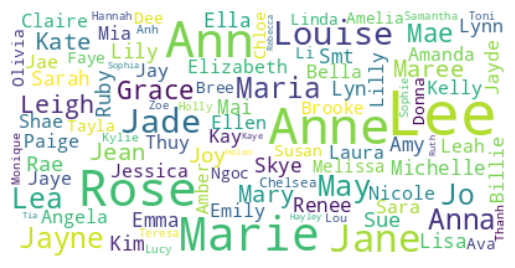

In [533]:
# Start with one review:
text = df.Name[0]
print(text)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [534]:
# Save the image in the img folder:
wordcloud.to_file("first_wcf.png")

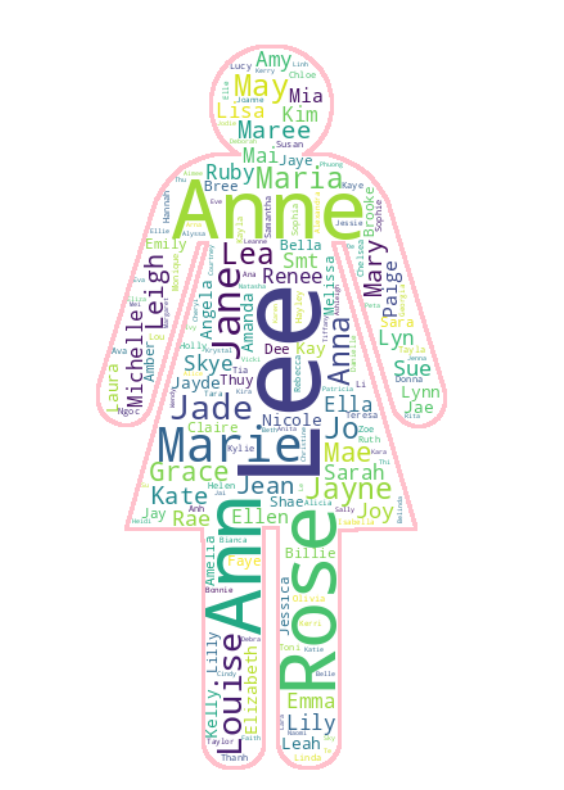

In [535]:
text = df.Name[0]

# Create a word cloud image
woman_mask = np.array(Image.open("pngwing.png"))
wc = WordCloud(background_color="white", max_words=1000, mask=woman_mask, contour_width=4, contour_color='pink')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("woman.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

James, John, Robert, Michael, William, David, Joseph, Richard, Charles, Thomas, Christopher, Daniel, Matthew, Anthony, George, Donald, Paul, Mark, Andrew, Steven, Kenneth, Edward, Joshua, Brian, Kevin, Timothy, Jason, Ronald, Ryan, Jeffrey, Jacob, Nicholas, Eric, Frank, Gary, Stephen, Jonathan, Justin, Brandon, Larry, Scott, Benjamin, Raymond, Samuel, Gregory, Alexander, Patrick, Jack, Henry, Dennis, Walter, Tyler, Peter, Aaron, Jerry, Adam, Nathan, Douglas, Jose, Zachary, Harold, Arthur, Kyle, Carl, Albert, Jeremy, Lawrence, Gerald, Sean, Joe, Keith, Willie, Roger, Jesse, Ethan, Terry, Christian, Harry, Austin, Ralph, Roy, Noah, Bryan, Jordan, Louis, Bruce, Billy, Dylan, Eugene, Wayne, Russell, Alan, Juan, Gabriel, Philip, Vincent, Howard, Fred, Logan, Randy, Bradley, Victor, Travis, Shawn, Phillip, Martin, Johnny, Craig, Bobby, Ernest, Stanley, Cody, Clarence, Elijah, Leonard, Carlos, Cameron, Caleb, Isaac, Todd, Earl, Francis, Jimmy, Mason, Danny, Luke, Dale, Alex, Joel, Evan, Luis,

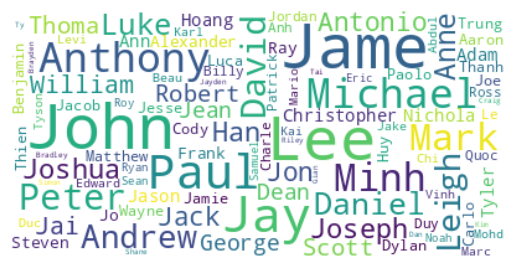

In [536]:
# Start with one review:
text = df.Name[1]
print(text)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [537]:
# Save the image in the img folder:
wordcloud.to_file("first_wcm.png")

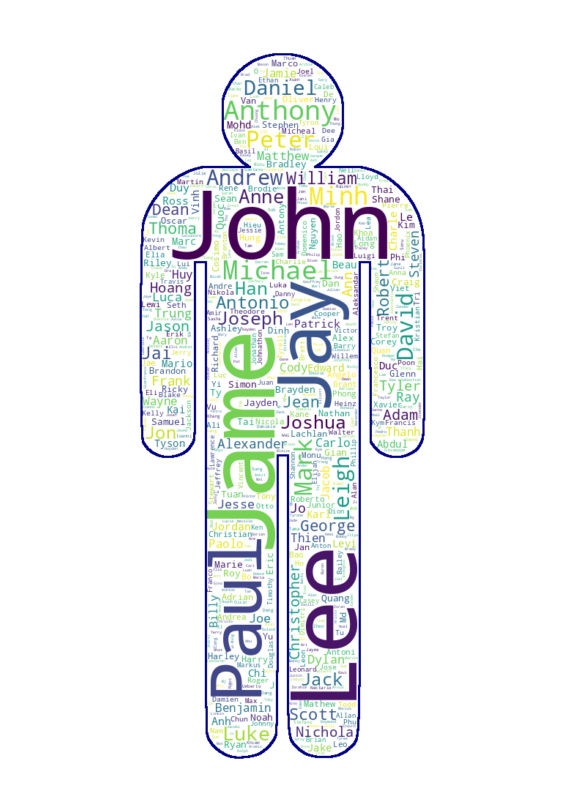

In [538]:
text = df.Name[1]

# Create a word cloud image
woman_mask = np.array(Image.open("pngming.png"))
wc = WordCloud(background_color="white", max_words=1000, mask=woman_mask, contour_width=4, contour_color='navy')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("man.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()